Installing and importing the packages which are required in the project

In [1]:
%pip install pycaret
%pip install lightgbm

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.linear_model import LogisticRegression  
import pickle 
import xgboost as xgb
import lightgbm as lgb
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt

Importing the data from the csv file

In [2]:
data=pd.read_csv('data.csv')

In [ ]:
data.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [ ]:
data.shape

(669639, 2)

In [ ]:
data.isnull().sum()

password    0
strength    0
dtype: int64

<Axes: xlabel='strength', ylabel='Count'>

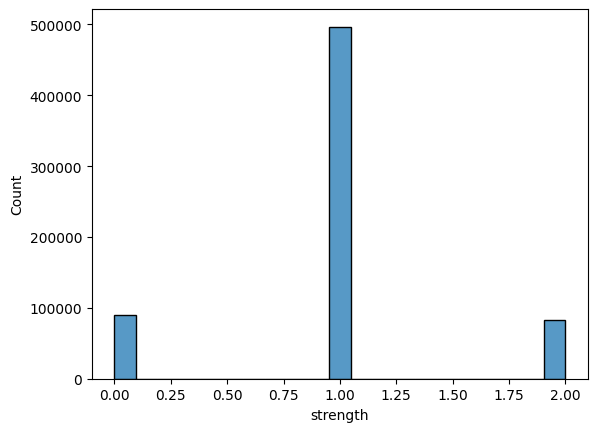

In [ ]:
sns.histplot(data['strength'])

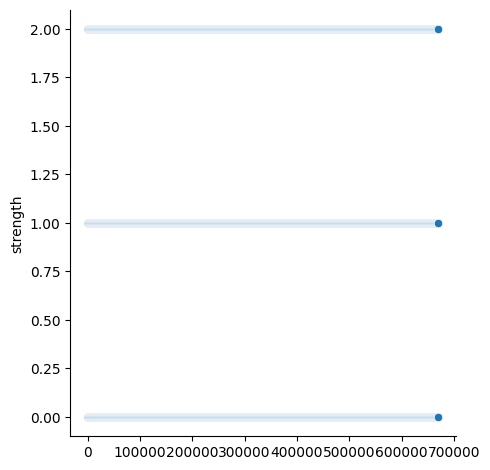

In [ ]:
sns.relplot(data['strength'])

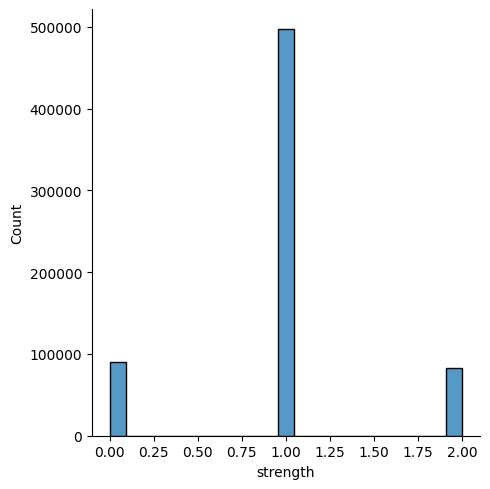

In [ ]:
sns.displot(data['strength'])

<Axes: xlabel='strength', ylabel='count'>

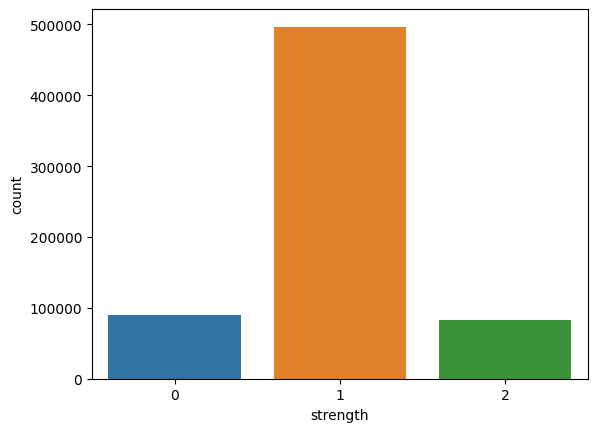

In [ ]:
sns.countplot(x=data["strength"])

In [18]:
def word_divider(words):
    char=[]
    for i in words:
        char.append(i)
    return char

In [19]:
x = np.array(data["password"])
y = np.array(data["strength"])

tdif = TfidfVectorizer(tokenizer=word_divider)
x = tdif.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.05, 
                                                random_state=42)

C:\Dev\anaconda\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Training models from the training data

In [ ]:
start = time.time()
rf = RandomForestClassifier(n_estimators = 100,verbose=3,n_jobs=-1)
rf.fit(xtrain, ytrain)
print("The operation took ",time.time() - start,"seconds")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  8.3min


building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 29.6min finished


In [ ]:
start = time.time()
lor = LogisticRegression(max_iter=1500)
lor.fit(xtrain, ytrain)
print("The operation took: ",time.time() - start,"seconds")

The operation took:  85.63949084281921 seconds


In [ ]:
start = time.time()
xg = xgb.XGBClassifier(n_jobs=-1)
xg.fit(xtrain,ytrain)
print("The operation took: ",time.time() - start,"seconds")

In [ ]:
start = time.time()
model = LGBMClassifier()
model.fit(xtrain, ytrain)
print("The operation took: ",time.time() - start,"seconds")

The operation took:  31.75286078453064 seconds


Creating new variables to store the accuracies of the current models

In [ ]:
rf_test_acc = rf.score(xtest, ytest)*100
rf_train_acc = rf.score(xtrain, ytrain)*100

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    6.8s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:   23.0s finished


In [ ]:
lor_test_acc = lor.score(xtest, ytest)*100
lor_train_acc = lor.score(xtrain, ytrain)*100


In [ ]:
xg_test_acc = xg.score(xtest, ytest)*100
xg_train_acc = xg.score(xtrain, ytrain)*100

In [ ]:
lgb_test_acc = model.score(xtest, ytest)*100
lgb_train_acc = model.score(xtrain, ytrain)*100

Saving Models and vectorizer with accuracies

In [ ]:
##Saving the tdifvectorizer
with open('tdif.pkl', 'wb') as file:
    pickle.dump(tdif, file)

In [ ]:
##Random forest with model,testing accuracy and training accuracy
with open('rf.pkl', 'wb') as f:
    pickle.dump({'model': rf, 'test_accuracy':rf_test_acc,'train_accuracy':rf_train_acc }, f)

In [ ]:
##Logistic Regression with  model,testing accuracy and training accuracy
with open('lor.pkl', 'wb') as f:
    pickle.dump({'model': lor, 'test_accuracy':lor_test_acc,'train_accuracy':lor_train_acc }, f)

In [ ]:
##XGBoost  with  model,testing accuracy and training accuracy
with open('xg.pkl', 'wb') as f:
    pickle.dump({'model': xg, 'test_accuracy':xg_test_acc,'train_accuracy':xg_train_acc }, f)

In [ ]:
##LGBoost  with  model,testing accuracy and training accuracy
with open('lgb.pkl', 'wb') as f:
    pickle.dump({'model': model, 'test_accuracy':lgb_test_acc,'train_accuracy':lgb_train_acc }, f)

Using the saved models to create a confusion matrix

In [60]:
with open('lor.pkl', 'rb') as f:
    lor = pickle.load(f)

In [61]:
with open('rf.pkl', 'rb') as f:
    rf = pickle.load(f)

In [62]:
with open('lgb.pkl', 'rb') as f:
    lgb = pickle.load(f)

C:\Dev\anaconda\lib\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator LabelEncoder from version 1.2.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [63]:
with open('xg.pkl', 'rb') as f:
    xg = pickle.load(f)

In [86]:
from sklearn.metrics import confusion_matrix, classification_report

In [82]:
models = {
    'Random Forest': rf['model'],
    'Light Gradient Boosting': lgb['model'],
    'XGBoost': xg['model'],
    'Logistic Regression': lor['model']
}

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.2s finished


Random Forest Classification Report:
{'0': {'precision': 0.9564994882292733, 'recall': 0.825530035335689, 'f1-score': 0.8862019914651493, 'support': 4528}, '1': {'precision': 0.9554449671474671, 'recall': 0.9873443149859381, 'f1-score': 0.971132757700895, 'support': 24890}, '2': {'precision': 0.9602906825849987, 'recall': 0.9104330708661418, 'f1-score': 0.9346974864216243, 'support': 4064}, 'accuracy': 0.9561256794695657, 'macro avg': {'precision': 0.9574117126539131, 'recall': 0.9077691403959229, 'f1-score': 0.9306774118625563, 'support': 33482}, 'weighted avg': {'precision': 0.9561757436541438, 'recall': 0.9561256794695657, 'f1-score': 0.9552245248595351, 'support': 33482}}
Light Gradient Boosting Classification Report:
{'0': {'precision': 0.9447806354009077, 'recall': 0.827517667844523, 'f1-score': 0.8822698375323758, 'support': 4528}, '1': {'precision': 0.9602038815918448, 'recall': 0.9839292888710326, 'f1-score': 0.971921817640639, 'support': 24890}, '2': {'precision': 0.954375467

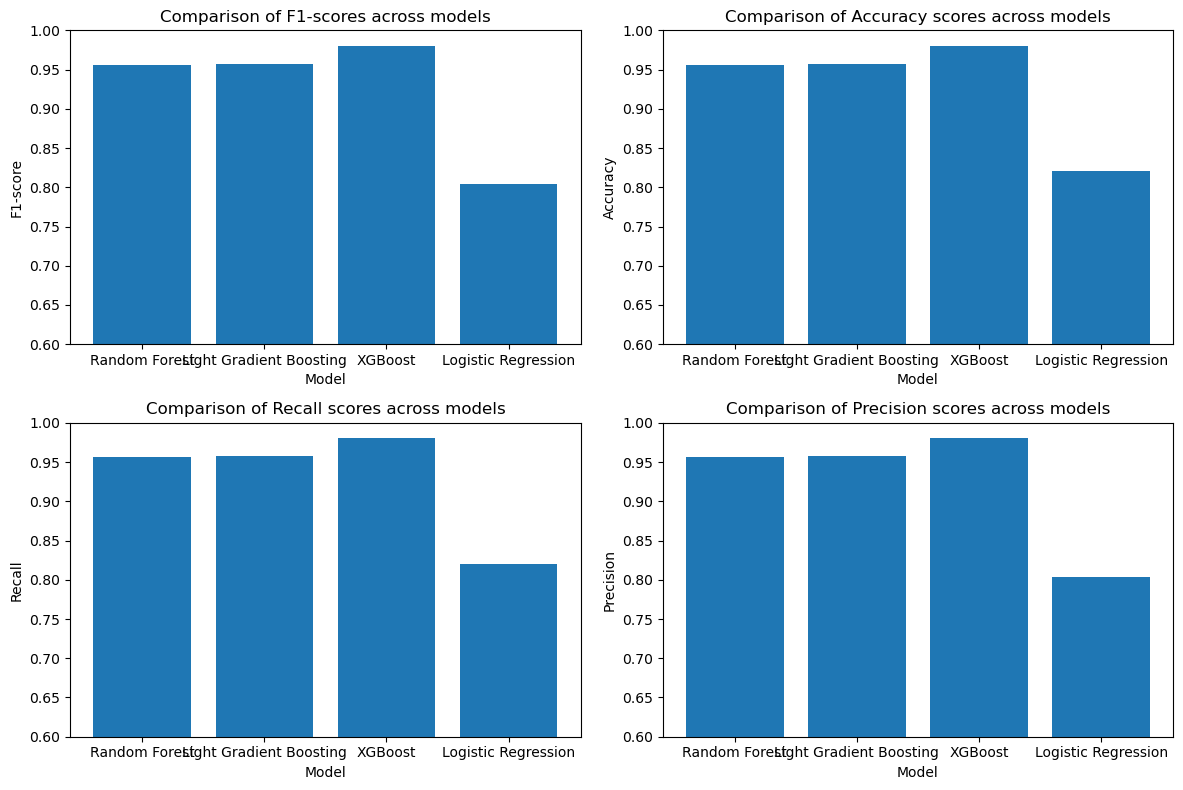

In [90]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
models = {
    'Random Forest': rf['model'],
    'Light Gradient Boosting': lgb['model'],
    'XGBoost': xg['model'],
    'Logistic Regression': lor['model']
}
f1_scores = []
accuracy_scores = []
recall_scores = []
precision_scores = []

for name, model in models.items():
    y_pred = model.predict(xtest)
    report = classification_report(ytest, y_pred, output_dict=True)
    f1_scores.append(report['weighted avg']['f1-score'])
    accuracy_scores.append(report['accuracy'])
    recall_scores.append(report['weighted avg']['recall'])
    precision_scores.append(report['weighted avg']['precision'])
    print(f'{name} Classification Report:')
    print(report)

# Plot bar chart
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
ax[0, 0].bar(models.keys(), f1_scores)
ax[0, 0].set_ylim(0.6, 1.0)
ax[0, 0].set_xlabel('Model')
ax[0, 0].set_ylabel('F1-score')
ax[0, 0].set_title('Comparison of F1-scores across models')

ax[0, 1].bar(models.keys(), accuracy_scores)
ax[0, 1].set_ylim(0.6, 1.0)
ax[0, 1].set_xlabel('Model')
ax[0, 1].set_ylabel('Accuracy')
ax[0, 1].set_title('Comparison of Accuracy scores across models')

ax[1, 0].bar(models.keys(), recall_scores)
ax[1, 0].set_ylim(0.6, 1.0)
ax[1, 0].set_xlabel('Model')
ax[1, 0].set_ylabel('Recall')
ax[1, 0].set_title('Comparison of Recall scores across models')

ax[1, 1].bar(models.keys(), precision_scores)
ax[1, 1].set_ylim(0.6, 1.0)
ax[1, 1].set_xlabel('Model')
ax[1, 1].set_ylabel('Precision')
ax[1, 1].set_title('Comparison of Precision scores across models')

plt.tight_layout()
plt.show()
